# 1.07 Activity 1


<font color='orange'> Refer to the files_for_activities/regression_data1.csv file. (The same file used in the class example.) </font>

<font color='orange'> Draw a box plot for the IC2. </font>



In [306]:
import pandas as pd
import numpy as np

import warnings # Para que ya no me muestre los warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 

In [307]:
data=pd.read_csv('regression_data1.csv')
data

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0
...,...,...,...,...,...,...,...,...
4838,701,297,335,405,468,15258,15.500000,25.0
4839,3357,284,455,343,447,24240,11.857143,19.0
4840,700,322,415,356,446,14360,11.333333,10.0
4841,601,206,225,251,289,9801,13.000000,25.0


<AxesSubplot:xlabel='IC2'>

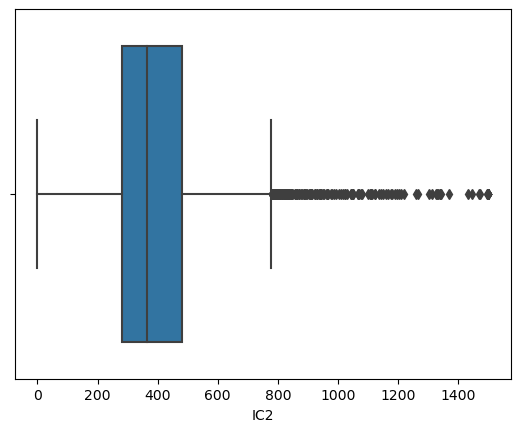

In [308]:
sns.boxplot(data['IC2'])

<font color='orange'> Print the descriptive statistics for IC2. </font>

In [309]:

data['IC2'].describe()

count    4843.000000
mean      401.913690
std       182.660078
min         0.000000
25%       283.000000
50%       366.000000
75%       481.000000
max      1500.000000
Name: IC2, dtype: float64

In [310]:
# Remove the outliers from the column IC2.
#Lo primero es calcular el IRQ

iqr=np.percentile(data['IC2'],75)-np.percentile(data['IC2'],25)

#Calcular los nuevos limites superior e inferior
#factor 1.5, si quisieramos dejar mas outlayers le damos un factor mas alto

upper_limit=np.percentile(data['IC2'],75)+1.5*iqr
lower_limit=np.percentile(data['IC2'],25)-1.5*iqr

# filtramos los datos dados los nuevos limites encimandolos sobre la misma base de datos

data=data[(data['IC2']>lower_limit) & (data['IC2']<upper_limit)]

<AxesSubplot:xlabel='IC2', ylabel='Density'>

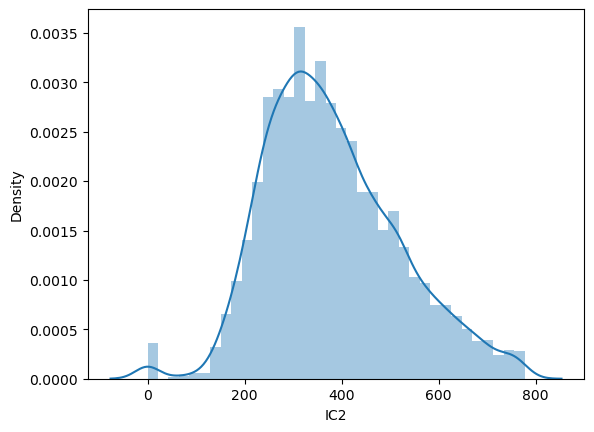

In [311]:
#Graficamos
#Ic2 ws el promedio de el ingreso de quien es la cabeza de la familia 
# un factor a considerar para saber de manera cualitativa que tanto nos encontramos en una distribbucion normal es ver que tanto se parece la media a la mediana
# En una distribucion normal perfecta, la media  (i.e el percentil 50%) es igual al promedio/media/mean
sns.distplot(data['IC2'])

# 1.07 Activity 2

<font color='orange'> Repeat the process(log transformation) for the column IC3. Define the function again yourself. </font>

In [312]:
data=pd.read_csv('regression_data1.csv')
data

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0
...,...,...,...,...,...,...,...,...
4838,701,297,335,405,468,15258,15.500000,25.0
4839,3357,284,455,343,447,24240,11.857143,19.0
4840,700,322,415,356,446,14360,11.333333,10.0
4841,601,206,225,251,289,9801,13.000000,25.0


In [313]:
# #para esta trasnf. hay que tener en cuenta que no existe (es -infty) el log 0
def log_transf_nan(x):
  x=np.log(x)
  if np.isfinite(x):
    return x
  else:
    return np.NAN

In [314]:
data['IC3_log']=list(map(log_transf_nan,data['IC3']))
data['IC3_log'].isnull().sum() #Contamos el numero de nulos


35

<AxesSubplot:xlabel='IC3_log', ylabel='Density'>

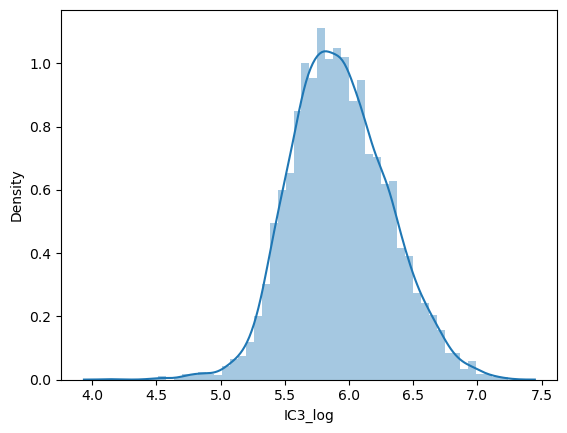

In [315]:
data['IC3_log']=data['IC3_log'].fillna(np.mean(data['IC3_log']))  # Aqui ya estamos rellenando los nulos
sns.distplot(data['IC3_log'])

<font color='orange'># Remove the tails of the transformed column to make it closer to the normal distribution. This time change the factor from 1.5 to 3 when calculating the upper limit and the lower limit. Check the distribution plot. Does it remove the tails effectively? If not change the factor back to 1.5 and see the results. </font>

In [316]:

iqr=np.percentile(data['IC3_log'],75)-np.percentile(data['IC3_log'],25)

upper_limit=np.percentile(data['IC3_log'],75)+3*iqr
lower_limit=np.percentile(data['IC3_log'],25)-3*iqr

data=data[(data['IC3_log']>lower_limit) & (data['IC3_log']<upper_limit)]




<AxesSubplot:xlabel='IC3_log', ylabel='Density'>

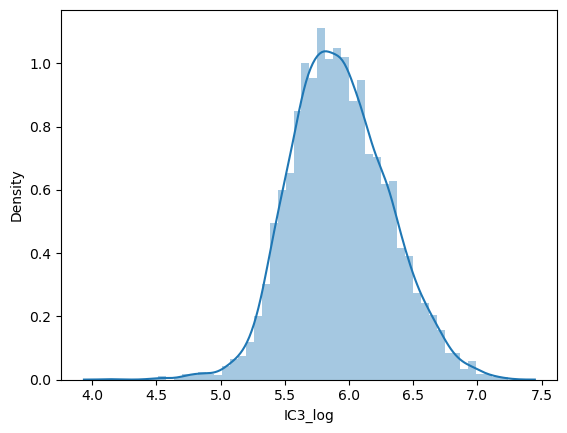

In [317]:
sns.distplot(data['IC3_log'])

<AxesSubplot:xlabel='IC3_log', ylabel='Density'>

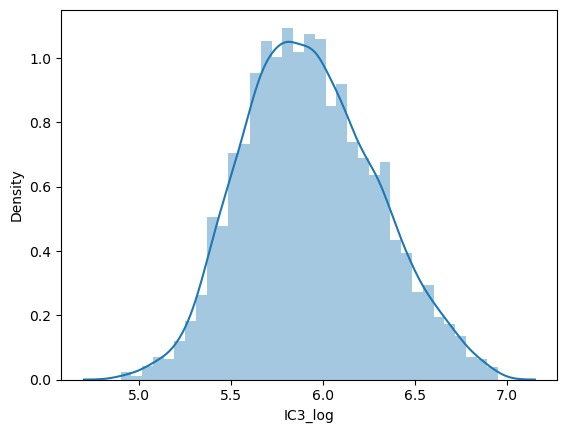

In [318]:

iqr=np.percentile(data['IC3_log'],75)-np.percentile(data['IC3_log'],25)

upper_limit=np.percentile(data['IC3_log'],75)+1.5*iqr
lower_limit=np.percentile(data['IC3_log'],25)-1.5*iqr

data=data[(data['IC3_log']>lower_limit) & (data['IC3_log']<upper_limit)]
sns.distplot(data['IC3_log'])
# Si los remueve, pero el factor 1.5 me acerca mas a la distribucion normal 

<AxesSubplot:xlabel='IC3_log'>

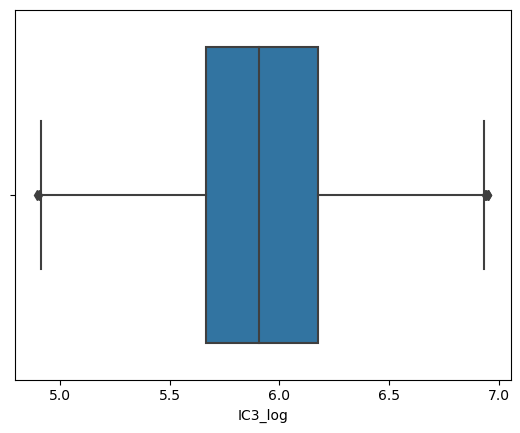

In [319]:
sns.boxplot(x=data['IC3_log'])
#Como sabes a "vista" que una grafica parece una distribucion normal
#1 Analizar la grafica
#2 Analizar las 'cinturitas' de la distribucion (i.e las curvas cercanas al eje x)
#3 Ver que tan achatada esta en la parte superior (i.e que no tenga curtosis alta)

# 1.07 Activity 3

<font color='orange'>Repeat the same steps for column IC5 for box-cox transformation. </font>

In [320]:
from scipy import stats #Aplicamos la transformacion



In [321]:
#Aquí calculamos el % de datos que no cumplen con la condción necesaria para la trasonf
100*len(data[data['IC5']<=0])/len(data['IC5'])

0.7302315877321093

<AxesSubplot:ylabel='Density'>

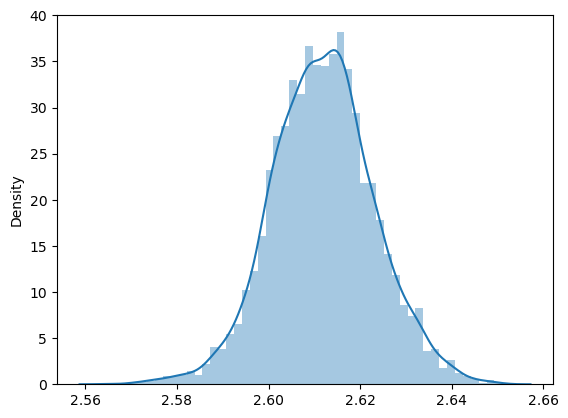

In [322]:
data['IC5_p']=np.where(data['IC5']<0,0,data['IC5']) #Sustituye valores por que esta transformacion funciona solamente cuando toda la data es positiva
mean = np.sum(data['IC5_p'])/len(data[data['IC5_p']>0])
data['IC5_p'] = data['IC5_p'].replace(0,mean)
data=data.drop(['IC5'], axis=1)
# BoxCox va a buscar alguna modificacion de la form y^lmbda que mejor se ajuste a una distriobucoon normal 
# Los rangos "comunes" de la transformacion boxcox es de -3 a 3
xt2, lmbda2 = stats.boxcox(data['IC5_p']) #xt2 es mi columna ya transformada 
# xt2 aun no es parte del databasae completo, necesito crearle la columna con su propio nombre para añadirla
data['IC5_BC']=xt2
sns.distplot(xt2)

In [323]:
lmbda2

-0.37201856392462507

# 1.07 Activity 4

<font color='orange'> Load data regression_data.csv. </font>

<font color="orange"> Select 3 numeric columns.</font>

<font color="orange"> Plot distributions.</font>

<font color="orange"> Normalize</font>

<font color="orange"> Plot new distributions.</font>

In [325]:
data.describe()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
count,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000
mean,1163.701425,352.831922,401.913690,400.962214,446.035102,16483.862482,11.836754,15.624344
std,1032.104682,171.357547,182.660078,166.681913,176.689128,9499.090544,10.147951,12.445137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.260870,1.000000
25%,548.000000,239.000000,283.000000,287.000000,325.000000,11164.000000,7.181818,10.000000
50%,809.000000,318.000000,366.000000,366.000000,411.000000,14377.000000,10.000000,13.000000
75%,1367.500000,427.000000,481.000000,482.500000,531.500000,18819.500000,14.500000,20.000000
max,5982.000000,1500.000000,1500.000000,1394.000000,1394.000000,174523.000000,450.000000,200.000000


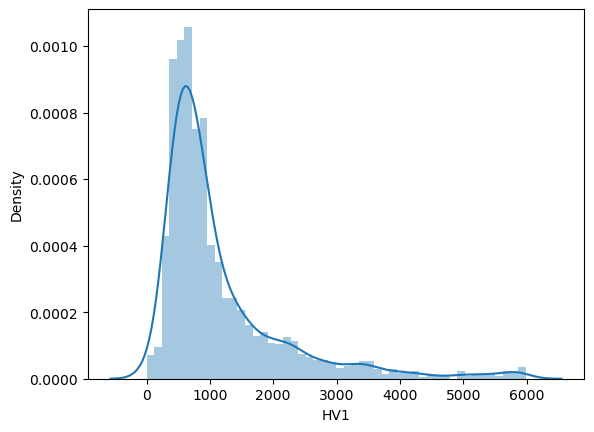

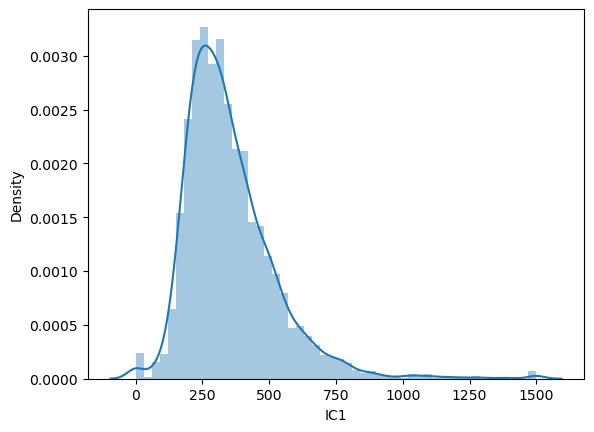

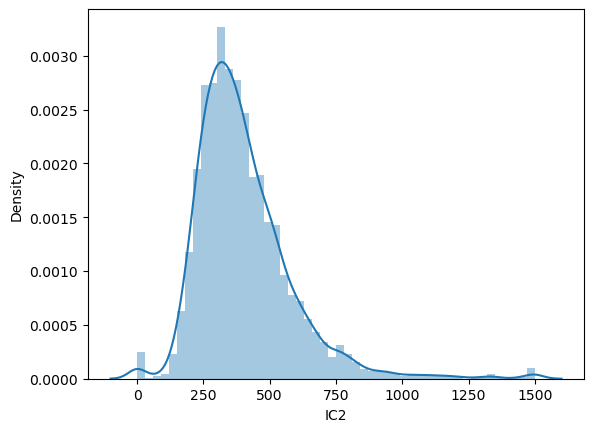

In [336]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('regression_data1.csv')
df.head()
# 2
# si quisieramos tomar solo 10 renglones de las 3 primeras columnas
#df.get_numeric_data().iloc[0,10 : 0:3]

# No necessariamente tienen que estar en orden la peticion de registros y columnas
# df.get_numeric_data().iloc[0:10, 0:3].dropna()
 
data2=df._get_numeric_data().iloc[:, 0:3].dropna()
# 3
# Cuando vamos a normalizar no debe haber ni un NAN, se le debe dar el tratamiento previo, ya sea quitar los NAN, sustituirlos por la media, etc

for i in range(3):
    sns.distplot(data2.iloc[:,i])
    #cuando queremos que en un momento dado ya nos de el output de la grafica, debemos poner el plt.show(), ssi no, me empalma las graficas
    plt.show()

#


          0         1         2
0  0.967554  0.173219  0.183942
1  0.701459  0.493985  0.513745
2  0.872882  0.333101  0.356539
3  0.811765  0.369665  0.452090
4  0.944984  0.214098  0.247320


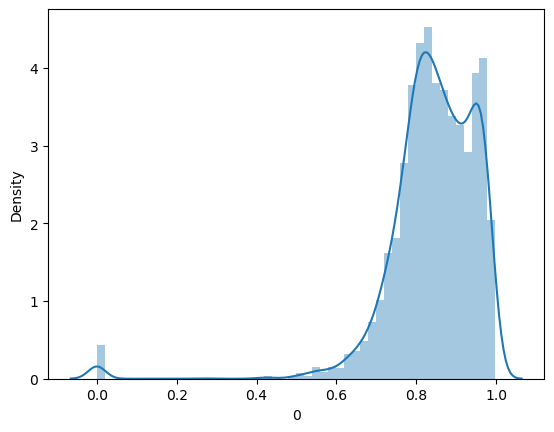

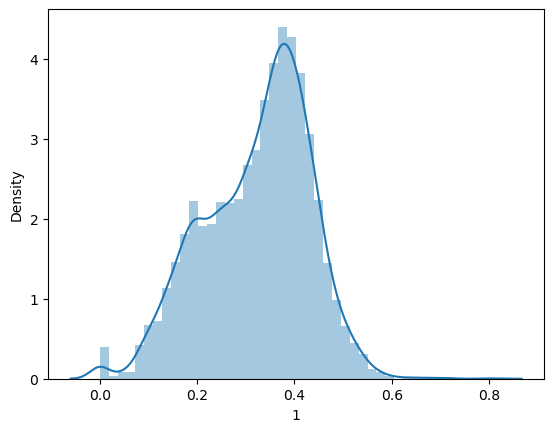

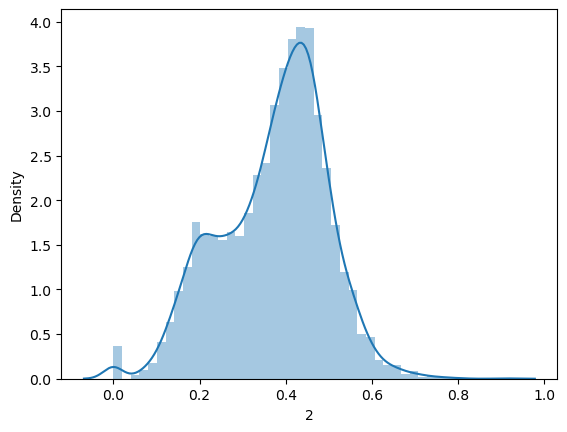

In [342]:
 #4
from sklearn.preprocessing import Normalizer   

# Primero generamos la "maquinaria" y de una vez lo ajustamos
transformer = Normalizer().fit(data2)
x_norm = transformer.transform(data2)

#Los arreglos de dataframe no tienen nombre en las columnas, los dataframe si

data3=pd.DataFrame(x_norm)
print(data3.head())

#5
#Aqui graficamos una grafica
# sns.distplot(data3.iloc[:,0])

#Aca vamos a graficar las 3 
for i in range(3):
    sns.distplot(data3.iloc[:,i])
    #cuando queremos que en un momento dado ya nos de el output de la grafica, debemos poner el plt.show(), ssi no, me empalma las graficas
    plt.show()